In [ ]:
#include <stdio.h>

int main() {
    int n, count = 0;
    
    printf("Введите n: ");
    scanf("%d", &n);
    
    for (int i = 1; i <= n; i++) {
        if (i % 11 != 0 && i % 5 != 0) {
            count++;
        }
    }
    
    printf("Количество чисел от 1 до %d, не делящихся на 11 или на 5: %d\n", n, count);
    return 0;
}

In [ ]:
section .data
    prompt db "Введите n: ", 0
    prompt_len equ $ - prompt
    result db "Количество чисел: ", 0
    result_len equ $ - result
    newline db 10

section .bss
    n resd 1
    count resd 1
    buffer resb 10

section .text
    global _start

_start:
    mov eax, 4
    mov ebx, 1
    mov ecx, prompt
    mov edx, prompt_len
    int 0x80

    mov eax, 3
    mov ebx, 0
    mov ecx, buffer
    mov edx, 10
    int 0x80

    mov esi, buffer
    xor eax, eax
    xor ebx, ebx
convert_loop:
    mov bl, [esi]
    cmp bl, 10
    je convert_done
    sub bl, '0'
    imul eax, 10
    add eax, ebx
    inc esi
    jmp convert_loop
convert_done:
    mov [n], eax

    mov ecx, 1
    mov dword [count], 0

main_loop:
    cmp ecx, [n]
    jg done

    mov eax, ecx
    xor edx, edx
    mov ebx, 11
    div ebx
    cmp edx, 0
    je next_number

    mov eax, ecx
    xor edx, edx
    mov ebx, 5
    div ebx
    cmp edx, 0
    je next_number

    inc dword [count]

next_number:
    inc ecx
    jmp main_loop

done:
    mov eax, 4
    mov ebx, 1
    mov ecx, result
    mov edx, result_len
    int 0x80

    mov eax, [count]
    mov edi, buffer + 9
    mov byte [edi], 0
    mov ebx, 10

convert_to_string:
    dec edi
    xor edx, edx
    div ebx
    add dl, '0'
    mov [edi], dl
    test eax, eax
    jnz convert_to_string

    mov ecx, edi
    mov edx, buffer + 10
    sub edx, edi
    mov eax, 4
    mov ebx, 1
    int 0x80

    mov eax, 4
    mov ebx, 1
    mov ecx, newline
    mov edx, 1
    int 0x80

    mov eax, 1
    xor ebx, ebx
    int 0x80

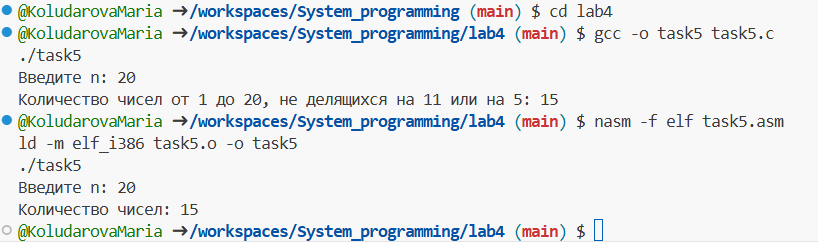

In [ ]:
#include <stdio.h>
#include <string.h>

int main() {
    char correct_password[] = "password123";
    char input[50];
    int attempts = 0;
    int max_attempts = 5;
    
    printf("Система аутентификации\n");
    
    while (attempts < max_attempts) {
        printf("Введите пароль (попытка %d/%d): ", attempts + 1, max_attempts);
        scanf("%s", input);
        
        if (strcmp(input, correct_password) == 0) {
            printf("Вошли\n");
            return 0;
        } else {
            printf("Неверный пароль\n");
            attempts++;
        }
    }
    
    printf("Неудача\n");
    return 1;
}

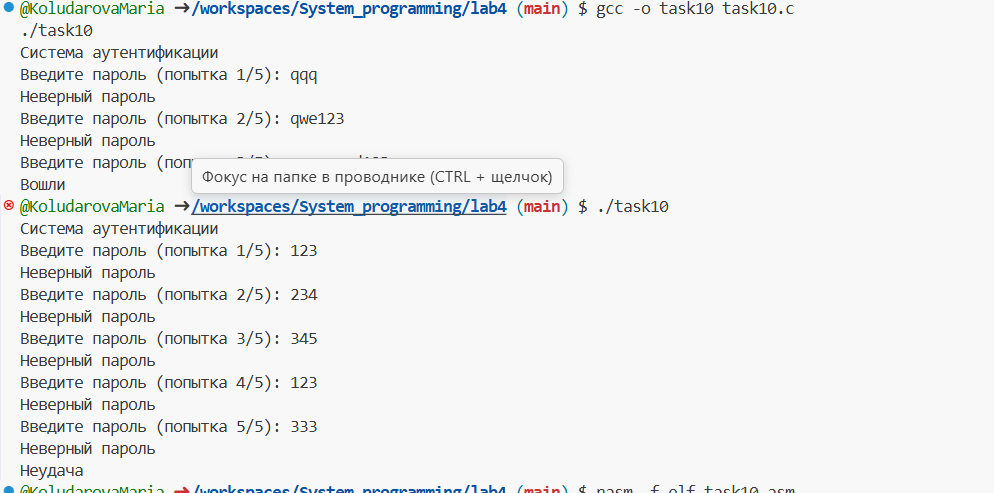

In [ ]:
section .data
    prompt db "Введите пароль: ", 0
    prompt_len equ $ - prompt
    correct db "password123", 0
    success db "Вошли", 10, 0
    success_len equ $ - success
    wrong db "Неверный пароль", 10, 0
    wrong_len equ $ - wrong
    failure db "Неудача", 10, 0
    failure_len equ $ - failure
    attempt_msg db " (попытка ", 0
    attempt_msg_len equ $ - attempt_msg
    slash db "/5)", 10, 0
    slash_len equ $ - slash

section .bss
    input resb 50
    attempts resd 1

section .text
    global _start

_start:
    mov dword [attempts], 0

auth_loop:
    mov eax, [attempts]
    cmp eax, 5
    jge auth_failure

    mov eax, 4
    mov ebx, 1
    mov ecx, prompt
    mov edx, prompt_len
    int 0x80

    mov eax, 4
    mov ebx, 1
    mov ecx, attempt_msg
    mov edx, attempt_msg_len
    int 0x80

    mov eax, [attempts]
    inc eax
    add al, '0'
    mov [input], al
    mov eax, 4
    mov ebx, 1
    mov ecx, input
    mov edx, 1
    int 0x80

    mov eax, 4
    mov ebx, 1
    mov ecx, slash
    mov edx, slash_len
    int 0x80

    mov eax, 3
    mov ebx, 0
    mov ecx, input
    mov edx, 50
    int 0x80

    mov esi, input
find_newline:
    cmp byte [esi], 10
    je remove_newline
    inc esi
    jmp find_newline
remove_newline:
    mov byte [esi], 0

    mov esi, input
    mov edi, correct
compare_loop:
    mov al, [esi]
    mov bl, [edi]
    cmp al, bl
    jne password_wrong
    cmp al, 0
    je password_correct
    inc esi
    inc edi
    jmp compare_loop

password_correct:
    mov eax, 4
    mov ebx, 1
    mov ecx, success
    mov edx, success_len
    int 0x80
    jmp exit_success

password_wrong:
    mov eax, 4
    mov ebx, 1
    mov ecx, wrong
    mov edx, wrong_len
    int 0x80
    inc dword [attempts]
    jmp auth_loop

auth_failure:
    mov eax, 4
    mov ebx, 1
    mov ecx, failure
    mov edx, failure_len
    int 0x80

exit_success:
    mov eax, 1
    xor ebx, ebx
    int 0x80

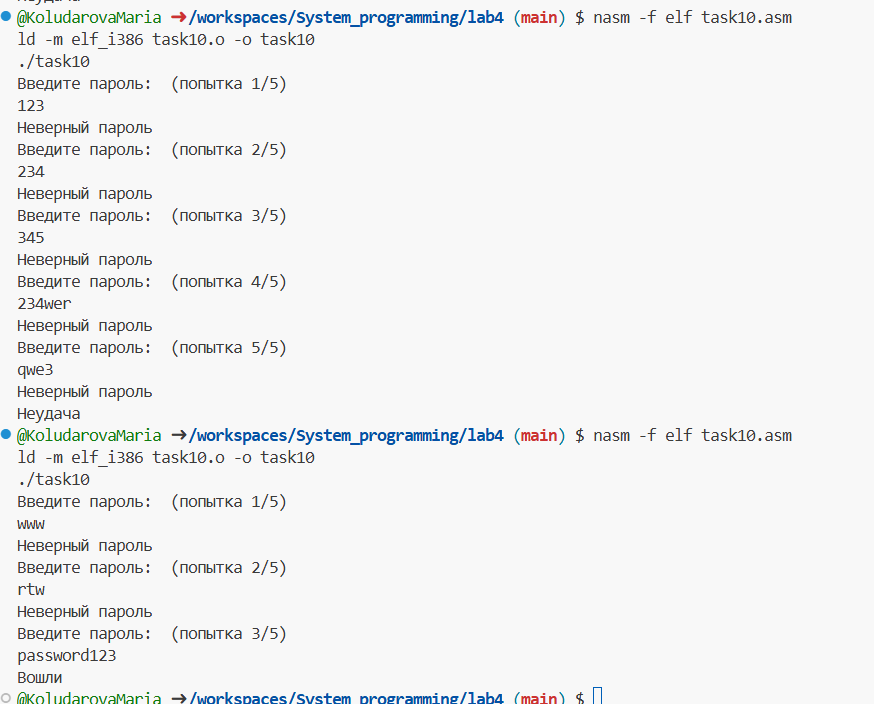

In [ ]:
#include <stdio.h>

int main() {
    int n;
    
    printf("Введите n: ");
    scanf("%d", &n);
    
    printf("Числа, совпадающие с последними разрядами своих квадратов:\n");
    
    for (int i = 1; i <= n; i++) {
        long long square = (long long)i * i;
        int temp = i;
        int digits = 0;
        
        while (temp > 0) {
            digits++;
            temp /= 10;
        }
        
        long long power = 1;
        for (int j = 0; j < digits; j++) {
            power *= 10;
        }
        
        if (square % power == i) {
            printf("%d (квадрат: %lld)\n", i, square);
        }
    }
    
    return 0;
}

In [ ]:
section .data
    prompt db "Введите n: ", 0
    prompt_len equ $ - prompt
    result db "Числа, совпадающие с последними разрядами своих квадратов:", 10, 0
    result_len equ $ - result
    format db " (квадрат: ", 0
    format_len equ $ - format
    closing db ")", 10, 0
    closing_len equ $ - closing

section .bss
    n resd 1
    i resd 1
    digits resd 1
    power resd 1
    buffer resb 20
    num_buffer resb 10

section .text
    global _start

_start:
    mov eax, 4
    mov ebx, 1
    mov ecx, prompt
    mov edx, prompt_len
    int 0x80

    mov eax, 3
    mov ebx, 0
    mov ecx, buffer
    mov edx, 10
    int 0x80

    mov esi, buffer
    xor eax, eax
convert_loop:
    mov bl, [esi]
    cmp bl, 10
    je convert_done
    sub bl, '0'
    imul eax, 10
    add eax, ebx
    inc esi
    jmp convert_loop
convert_done:
    mov [n], eax

    mov eax, 4
    mov ebx, 1
    mov ecx, result
    mov edx, result_len
    int 0x80

    mov dword [i], 1

main_loop:
    mov eax, [i]
    cmp eax, [n]
    jg exit_program

    mov eax, [i]
    mul eax
    mov ebx, eax

    mov eax, [i]
    mov dword [digits], 0
    mov ecx, eax
count_digits:
    cmp ecx, 0
    je count_done
    inc dword [digits]
    mov eax, ecx
    mov ebx, 10
    xor edx, edx
    div ebx
    mov ecx, eax
    jmp count_digits
count_done:
    mov dword [power], 1
    mov ecx, [digits]
calc_power:
    cmp ecx, 0
    je calc_done
    mov eax, [power]
    mov ebx, 10
    mul ebx
    mov [power], eax
    dec ecx
    jmp calc_power
calc_done:
    mov eax, [i]
    mul eax
    mov ebx, [power]
    xor edx, edx
    div ebx
    mov eax, edx
    cmp eax, [i]
    jne next_number

    mov eax, [i]
    call print_number

    mov eax, 4
    mov ebx, 1
    mov ecx, format
    mov edx, format_len
    int 0x80

    mov eax, [i]
    mul eax
    call print_number

    mov eax, 4
    mov ebx, 1
    mov ecx, closing
    mov edx, closing_len
    int 0x80

next_number:
    inc dword [i]
    jmp main_loop

print_number:
    mov edi, num_buffer + 9
    mov byte [edi], 0
    mov ebx, 10
print_loop:
    dec edi
    xor edx, edx
    div ebx
    add dl, '0'
    mov [edi], dl
    test eax, eax
    jnz print_loop

    mov ecx, edi
    mov edx, num_buffer + 10
    sub edx, edi
    mov eax, 4
    mov ebx, 1
    int 0x80
    ret

exit_program:
    mov eax, 1
    xor ebx, ebx
    int 0x80

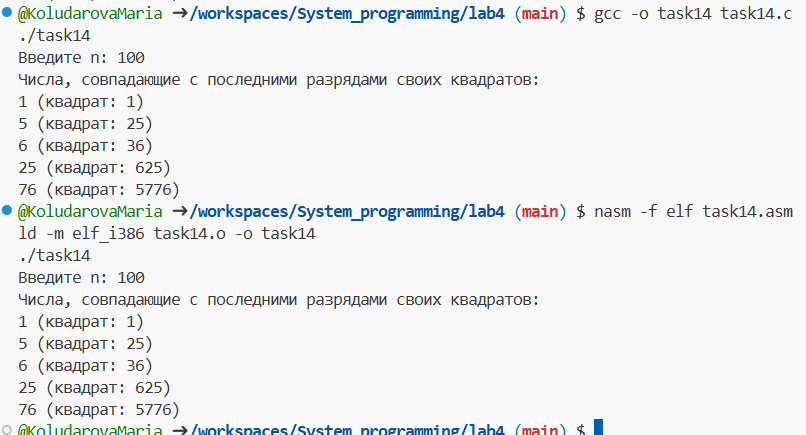